In [1]:
## required imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## read data
df = pd.read_csv('Twitter_5_year.csv')

In [3]:
# Shape
df.shape 

(299998, 15)

In [4]:
# Head
df.head()

,Account,User Name,Followers at Posting,Created,Type,Likes,Retweets,URL,Message,Screen Name,Link 1,Final Link 1,Link 2,Final Link 2,Score
0,juicy j,therealjuicyj,2645413.0,2019-06-13 23:49:25 EDT,Tweet,864,190,https://twitter.com/therealjuicyj/status/11393...,Whomever made bets made good money tonight,NaN,NaN,NaN,NaN,NaN,-3.59
1,Luke Combs 🎤,lukecombs,336828.0,2019-06-13 23:18:23 EDT,Tweet,3859,102,https://twitter.com/lukecombs/status/113937147...,.@nicohocking is bae,NaN,NaN,NaN,NaN,NaN,1.14
2,ADAM LAMBERT,adamlambert,2477885.0,2019-06-13 23:03:07 EDT,Link,832,343,https://twitter.com/adamlambert/status/1139367...,Korea! Tickets are on sale NOW for Queen + Ada...,NaN,http://ticket.yes24.com!,http://ticket.yes24.com!,https://t.co/CKCDd7BAK5,https://twitter.com/adamlambert/status/1139367...,-1.33
3,Russ,russdiemon,2043124.0,2019-06-13 22:56:16 EDT,Tweet,986,31,https://twitter.com/russdiemon/status/11393659...,What questions y’all want @KidSuper to ask me?...,NaN,NaN,NaN,NaN,NaN,-9.22
4,Gerardo Ortiz,gerardoortiznet,3082321.0,2019-06-13 22:43:58 EDT,Photo,727,76,https://twitter.com/gerardoortiznet/status/113...,🚘😎😜 https://t.co/4yeXAIbwA7,NaN,https://t.co/4yeXAIbwA7,https://twitter.com/gerardoortiznet/status/113...,NaN,NaN,1.89


In [5]:
# Print columns
df.columns

Index(['Account', 'User Name', 'Followers at Posting', 'Created', 'Type',
       'Likes', 'Retweets', 'URL', 'Message', 'Screen Name', 'Link 1',
       'Final Link 1', 'Link 2', 'Final Link 2', 'Score'],
      dtype='object')

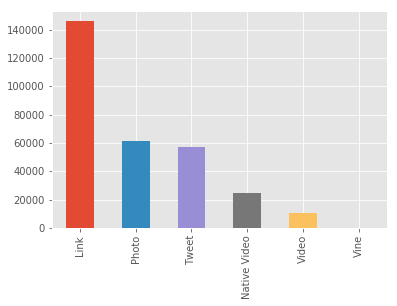

In [6]:
# Plot post types
df['Type'].value_counts().plot(kind='bar')
plt.show()

In [7]:
# Stats for numeric columns
df.describe()

,Followers at Posting,Likes,Retweets
count,2.906770e+05,2.999980e+05,299998.000000
mean,5.686041e+06,3.505200e+03,1067.533570
std,8.923077e+06,1.654647e+04,6502.039127
min,2.403100e+04,0.000000e+00,0.000000
25%,9.928680e+05,1.450000e+02,32.000000
50%,2.789862e+06,5.500000e+02,114.000000
75%,5.620443e+06,1.844000e+03,420.000000
max,6.606444e+07,1.308745e+06,674193.000000


In [8]:
# New dataframe with selected fields
df_selected_columns = df[['User Name', 'Followers at Posting', 'Created', 'Type',
       'Likes', 'Retweets']]
df_selected_columns.head()

,User Name,Followers at Posting,Created,Type,Likes,Retweets
0,therealjuicyj,2645413.0,2019-06-13 23:49:25 EDT,Tweet,864,190
1,lukecombs,336828.0,2019-06-13 23:18:23 EDT,Tweet,3859,102
2,adamlambert,2477885.0,2019-06-13 23:03:07 EDT,Link,832,343
3,russdiemon,2043124.0,2019-06-13 22:56:16 EDT,Tweet,986,31
4,gerardoortiznet,3082321.0,2019-06-13 22:43:58 EDT,Photo,727,76


In [9]:
# Convert "Created" into datetime 
df_selected_columns['Created'] = pd.to_datetime(df_selected_columns['Created'])

In [10]:
# Convert to the nearest hour (Used floor to select hour)
df_selected_columns['Created_Hour'] = df_selected_columns.Created.dt.floor('H')

In [11]:
# Aggregation at hour level
df_aggregate = df_selected_columns.groupby(["User Name", 'Created_Hour'], as_index=False).agg({"Created": "count", \
                                                    "Followers at Posting": "max", "Likes":"mean", "Retweets":"mean"})
df_aggregate.rename({'Created': 'Count', 'Followers at Posting':'Followers'}, axis=1, inplace=True)

In [12]:
df_aggregate.head(20)

,User Name,Created_Hour,Count,Followers,Likes,Retweets
0,1future,2015-09-11 15:00:00,1,1668274.0,242.0,133.0
1,1future,2015-09-11 17:00:00,1,1668274.0,195.0,124.0
2,1future,2015-09-11 18:00:00,1,1668274.0,249.0,145.0
3,1future,2015-09-11 21:00:00,1,1668274.0,126.0,42.0
4,1future,2015-09-11 23:00:00,1,1668274.0,3539.0,2442.0
5,1future,2015-09-12 02:00:00,1,1668274.0,276.0,147.0
6,1future,2015-09-12 17:00:00,1,1671266.0,281.0,186.0
7,1future,2015-09-12 22:00:00,1,1671266.0,272.0,148.0
8,1future,2015-09-12 23:00:00,1,1671266.0,1251.0,1047.0
9,1future,2015-09-13 00:00:00,1,1671266.0,1824.0,928.0


In [13]:
# Max number of tweets made by an artist in an hour
df_aggregate['Count'].max()

394

In [14]:
# Selected 5 artists
top_5 = ['jtimberlake', 'maluma', 'Pink', 'AvrilLavigne', 'WillieNelson']

In [15]:
df_top5 = df_aggregate[df_aggregate['User Name'].isin(top_5)].reset_index(drop = True)

In [16]:
df_top5['User Name'].unique()

array(['AvrilLavigne', 'Pink', 'WillieNelson', 'jtimberlake', 'maluma'],
      dtype=object)

In [17]:
df_top5.shape

(6320, 6)

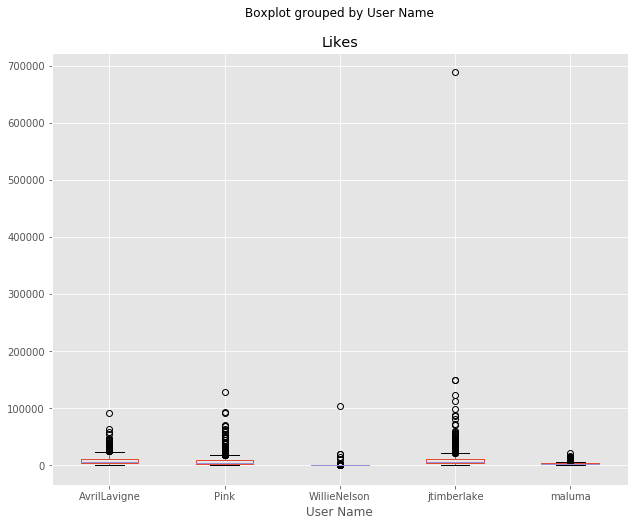

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
boxplot = df_top5.boxplot(column=['Likes'], by='User Name', ax=ax)

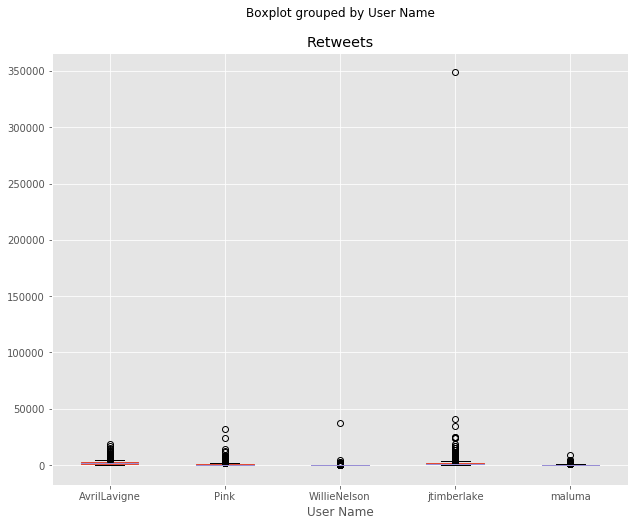

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
boxplot = df_top5.boxplot(column=['Retweets'], by='User Name', ax=ax)

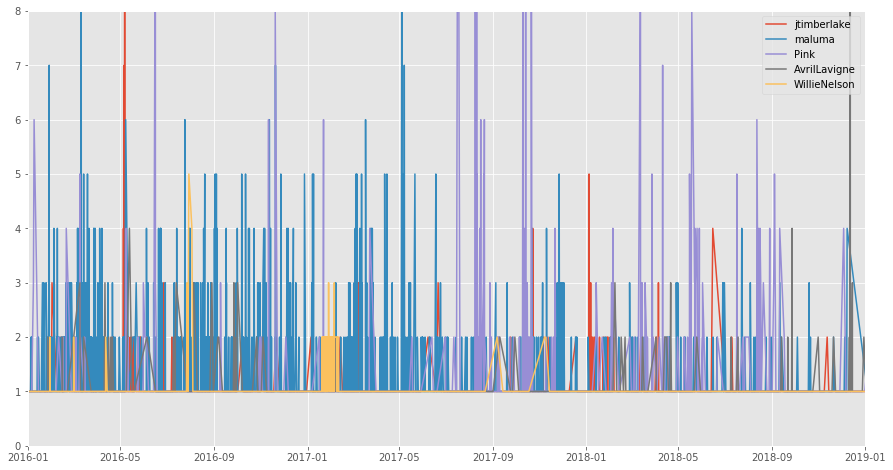

In [20]:
import datetime
fig, ax = plt.subplots(figsize=(15,8))                      
for x in top_5:
    df_artist = df_top5[df_top5['User Name']==x].reset_index(drop=True)
    plot = plt.plot(df_artist['Created_Hour'], df_artist['Count'], label = x)
ax.legend()
ax.set_xlim([datetime.date(2016, 1, 1), datetime.date(2019, 1, 1)]) # can adjust time interval here
ax.set_ylim(0,8)
plt.show()

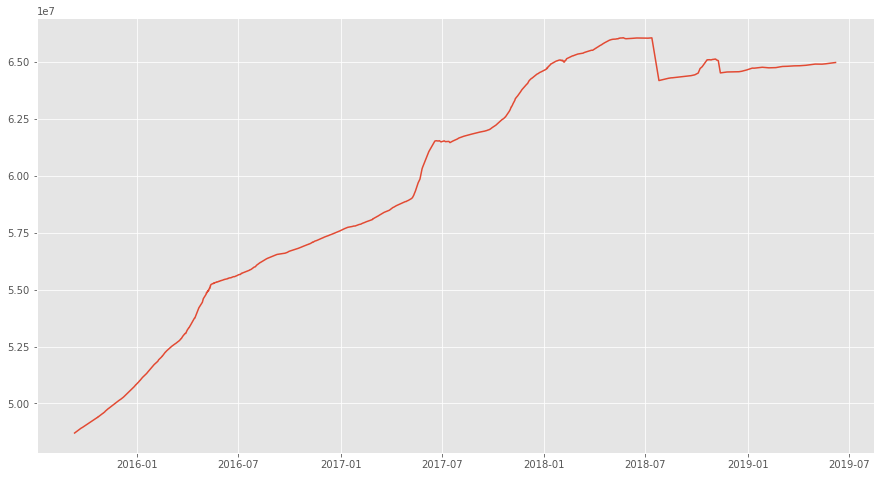

In [21]:
fig, ax = plt.subplots(figsize=(15,8))  
df_jt = df_top5[df_top5['User Name'] == 'jtimberlake']
plt.plot(df_jt['Created_Hour'], df_jt['Followers'])
plt.show()

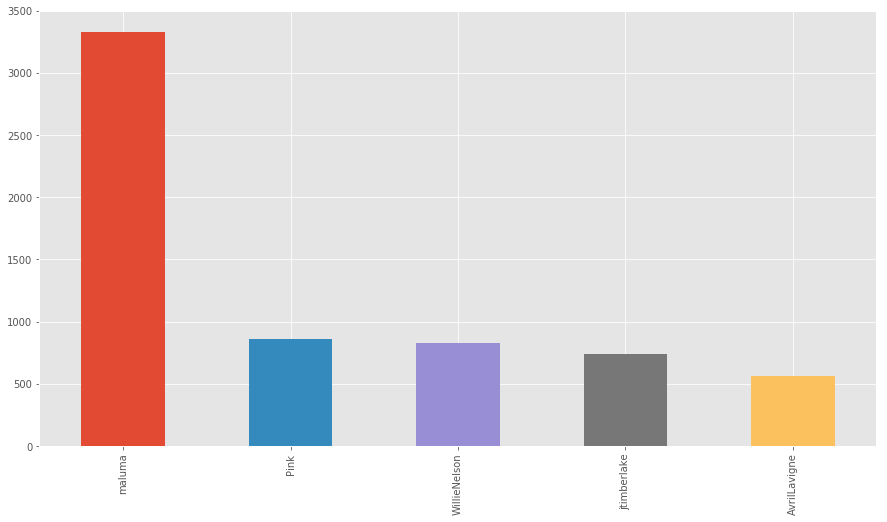

In [22]:
fig, ax = plt.subplots(figsize=(15,8))  
df_top5['User Name'].value_counts().plot(kind='bar', ax=ax)
plt.show()

In [23]:
# Write aggregated output to file
df_aggregate.to_csv('twitter_5yrs_agg.csv')